# New York Airbnb data analysis

## Import plot and data analysis lib

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import statistics as stat

## Read csv file

In [51]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv', encoding='unicode_escape')

## Format for floating-point values

In [52]:
pd.set_option('precision',2) 

## Get data column metrics

In [53]:
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Rename some long column names

In [54]:
airbnb_data.rename(columns={'host_id':'hostId',
                            'host_name':'hostName',
                            'neighbourhood_group':'neighbourhoodGroup',
                            'number_of_reviews':'reviews',
                            'last_review':'lastReview',
                            'calculated_host_listings_count':'listingsCount'},
                   inplace=True)

## Get sample datas, first 5 and last 5 rows

In [55]:
airbnb_data.head()

,id,name,hostId,hostName,neighbourhoodGroup,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews,lastReview,reviews_per_month,listingsCount,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [56]:
airbnb_data.tail()

,id,name,hostId,hostName,neighbourhoodGroup,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews,lastReview,reviews_per_month,listingsCount,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76,-73.99,Private room,90,7,0,NaN,NaN,1,23


## Simple analysis

In [57]:
airbnb_data.describe() 
# get basic statistic information. Reviews_per_month records are fewer than other matrics records

,id,hostId,latitude,longitude,price,minimum_nights,reviews,reviews_per_month,listingsCount,availability_365
count,4.89e+04,4.89e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,1.90e+07,6.76e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,1.10e+07,7.86e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2.54e+03,2.44e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9.47e+06,7.82e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,1.97e+07,3.08e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,2.92e+07,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,3.65e+07,2.74e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


## Check missing value

In [58]:
airbnb_data.isnull().sum()    # get the null records number of every metrics

id                        0
name                     16
hostId                    0
hostName                 21
neighbourhoodGroup        0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
reviews                   0
lastReview            10052
reviews_per_month     10052
listingsCount             0
availability_365          0
dtype: int64

### Check NaN value impact in reviews

In [59]:
# good reviews only contain non-nan values
# compare good reviews and all reviews record number

In [60]:
reviews_per_month= airbnb_data['reviews_per_month']
good_reviews = [review for review in reviews_per_month if not math.isnan(review)] 
reviews_number = len(reviews_per_month)
good_reviews_number = len(good_reviews)
if good_reviews_number == reviews_number:
    print(f"all reviews record are valid, the views number is {reviews_number}")
else:
    print(f"reviews number is: {reviews_number}")
    print(f"good reviews number is: {good_reviews_number}")

reviews number is: 48895
good reviews number is: 38843


### Check NaN value impact in price

In [61]:
# check whether all the prices records are valid

In [62]:
price= airbnb_data['price']
good_price = [p for p in price if not math.isnan(p)]
price_number = len(price)
good_price_number = len(good_price)
if good_price_number == price_number:
    print(f"all price records are valid, the price number is {price_number}")
else:
    print(f"reviews number is: {price_number}")
    print(f"good reviews number is: {good_price_number}")

all price records are valid, the price number is 48895


## Descriptive price statistics

In [63]:
# print the price histogram to see the price records distribution

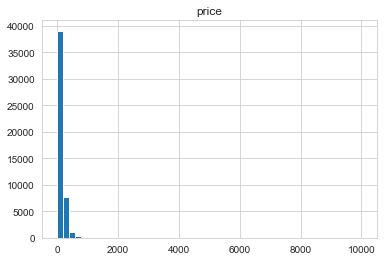

In [64]:
histogram = airbnb_data.hist('price',bins=50) 

In [65]:
print(f'median of price = {stat.median(good_price):.2f}')
print(f'25 percentile of price = {np.percentile(good_price, 25):.2f}')
print(f'75 percentile of price = {np.percentile(good_price, 75):.2f}')

median of price = 106.00
25 percentile of price = 69.00
75 percentile of price = 175.00


## Analyze neighbourhood group distribution

In [66]:
# count records number in each neighbourhood group
neighbourhood_group = airbnb_data['neighbourhoodGroup']
group={}
for item in neighbourhood_group:
    if item in group:
        group[item] += 1
    else:
        group[item] = 0

In [67]:
for name,record in group.items():
    print(name,':',record,'listings')

Brooklyn : 20103 listings
Manhattan : 21660 listings
Queens : 5665 listings
Staten Island : 372 listings
Bronx : 1090 listings


In [68]:
group_name = list(group.keys())
group_count = list(group.values())

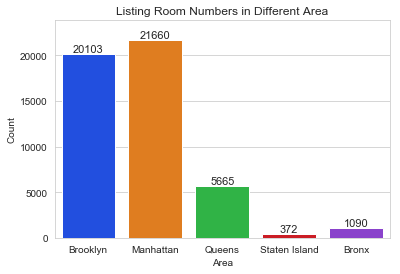

In [69]:
# print bar chart of listing number in each neighbourhood group
sns.set_style('whitegrid')  # white backround with gray grid lines
axes = sns.barplot(group_name, group_count, palette='bright')
axes.set_title('Listing Room Numbers in Different Area')
axes.set(xlabel='Area', ylabel='Count')

# Scale the y-axis by 10% to make room for text above the bars.
axes.set_ylim(top=1.10*max(group_count))

# Display the count above each patch (bar).
for bar, count in zip(axes.patches, group_count):
    text_x = bar.get_x() + bar.get_width()/2  
    text_y = bar.get_height() 
    text   = f'{count}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

plt.show()  # display the chart 

## Analyze Price in different location

### Median price by location

In [70]:
neibourhood_room = airbnb_data.groupby(['neighbourhoodGroup'])
median_price_neibourhood = neibourhood_room['price'].median()
print(f'median prices are:{median_price_neibourhood}')

median prices are:neighbourhoodGroup
Bronx             65
Brooklyn          90
Manhattan        150
Queens            75
Staten Island     75
Name: price, dtype: int64


### Price quartiles and interquartile range (IQR) by location

In [71]:
# get the price list of each neighbourhood group 
def price_in_location(location):
    return [price for price, loc in zip(airbnb_data.price, airbnb_data.neighbourhoodGroup) 
            if (loc == location)]

In [72]:
# define the funtion to get the statistics metrics of each price listss
def price_analysis_area(location): 
    price = price_in_location(location)
    price = np.array(price)
    median_price = np.median(price)
    per25_price = np.percentile(price,25)
    per75_price = np.percentile(price,75)
    iqr = per75_price - per25_price
                
    return (median_price, per25_price, per75_price,iqr)

#### Brooklyn

In [73]:
med_brooklyn, q1_brooklyn, q3_brooklyn,iqr_brooklyn = price_analysis_area('Brooklyn')

print(f'median price of Brooklyn   = {med_brooklyn}')
print(f'25 percentile price of Brooklyn   = {q1_brooklyn}')
print(f'75 percentile price of Brooklyn   = {q3_brooklyn}')
print(f'iqr price of Brooklyn   = {iqr_brooklyn}')

median price of Brooklyn   = 90.0
25 percentile price of Brooklyn   = 60.0
75 percentile price of Brooklyn   = 150.0
iqr price of Brooklyn   = 90.0


#### Manhattan

In [74]:
med_Manhattan, q1_Manhattan, q3_Manhattan,iqr_Manhattan = price_analysis_area('Manhattan')

print(f'median price of Manhattan   = {med_Manhattan}')
print(f'25 percentile price of Manhattan   = {q1_Manhattan}')
print(f'75 percentile price of Manhattan   = {q3_Manhattan}')
print(f'iqr price of Manhattan  = {iqr_Manhattan}')

median price of Manhattan   = 150.0
25 percentile price of Manhattan   = 95.0
75 percentile price of Manhattan   = 220.0
iqr price of Manhattan  = 125.0


#### Queens

In [75]:
med_Queens, q1_Queens, q3_Queens,iqr_Queens = price_analysis_area('Queens')

print(f'median price of Queens   = {med_Queens}')
print(f'25 percentile price of Queens   = {q1_Queens}')
print(f'75 percentile price of Queens   = {q3_Queens}')
print(f'iqr price of Queens  = {iqr_Queens}')

median price of Queens   = 75.0
25 percentile price of Queens   = 50.0
75 percentile price of Queens   = 110.0
iqr price of Queens  = 60.0


#### Staten Island

In [76]:
med_StatenIsland, q1_StatenIsland, q3_StatenIsland,iqr_StatenIsland = 
price_analysis_area('Staten Island')

print(f'median price of Staten Island   = {med_StatenIsland}')
print(f'25 percentile price of Staten Island   = {q1_StatenIsland}')
print(f'75 percentile price of Staten Island   = {q3_StatenIsland}')
print(f'iqr price of Staten Island  = {iqr_StatenIsland}')

median price of Staten Island   = 75.0
25 percentile price of Staten Island   = 50.0
75 percentile price of Staten Island   = 110.0
iqr price of Staten Island  = 60.0


#### Bronx

In [77]:
med_Bronx, q1_Bronx, q3_Bronx,iqr_Bronx = price_analysis_area('Bronx')

print(f'median price of Bronx   = {med_Bronx}')
print(f'25 percentile price of Bronx   = {q1_Bronx}')
print(f'75 percentile price of Bronx   = {q3_Bronx}')
print(f'iqr price of Bronx  = {iqr_Bronx}')

median price of Bronx   = 65.0
25 percentile price of Bronx   = 45.0
75 percentile price of Bronx   = 99.0
iqr price of Bronx  = 54.0


### Box chart of price ranges within each location 

Box chart of price ranges by location


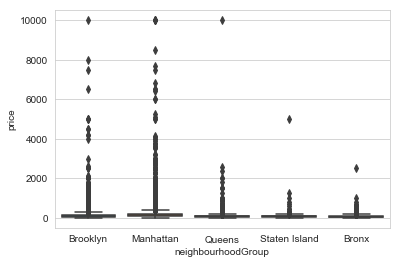

In [78]:
print('Box chart of price ranges by location')
boxplot = sns.boxplot(y='price', x='neighbourhoodGroup', data=airbnb_data)

## Analyze Price in diffent room type

### Median price by room type

In [79]:
room_type = airbnb_data.groupby(['room_type'])
median_price_type = room_type['price'].median()
print(f'median prices are:{median_price_type}')

median prices are:room_type
Entire home/apt    160
Private room        70
Shared room         45
Name: price, dtype: int64


### Price quartiles and interquartile range (IQR) by room type

In [80]:
# define the function to get price list according to room type
def price_in_RMtype(type):
    return [price for price, tp in zip(airbnb_data.price, airbnb_data.room_type) 
            if (tp == type)]

In [81]:
# define the funtion to get the statistics metrics of each price list
def price_analysis_type(type): 
    price = price_in_RMtype(type)
    price = np.array(price)
    median_price = np.median(price)
    per25_price = np.percentile(price,25)
    per75_price = np.percentile(price,75)
    iqr = per75_price - per25_price
                
    return (median_price, per25_price, per75_price,iqr)

#### Entire home and apartment

In [82]:
med_Entire, q1_Entire, q3_Entire,iqr_Entire = price_analysis_type('Entire home/apt')

print(f'median price of Entire home and apartment   = {med_Entire}')
print(f'25 percentile price of Entire home and apartment   = {q1_Entire}')
print(f'75 percentile price of Entire home and apartment   = {q3_Entire}')
print(f'interquartile price range of Entire home and apartment  = {iqr_Entire}')

median price of Entire home and apartment   = 160.0
25 percentile price of Entire home and apartment   = 120.0
75 percentile price of Entire home and apartment   = 229.0
interquartile price range of Entire home and apartment  = 109.0


#### Private room

In [83]:
med_private, q1_private, q3_private,iqr_private = price_analysis_type('Private room')

print(f'median price of Private room  = {med_private}')
print(f'25 percentile price of Private room   = {q1_private}')
print(f'75 percentile price of Private room   = {q3_private}')
print(f'interquartile price range of Private room  = {iqr_private}')

median price of Private room  = 70.0
25 percentile price of Private room   = 50.0
75 percentile price of Private room   = 95.0
interquartile price range of Private room  = 45.0


#### Shared room

In [84]:
med_shared, q1_shared, q3_shared,iqr_shared = price_analysis_type('Shared room')

print(f'median price of Shared room  = {med_shared}')
print(f'25 percentile price of Shared room   = {q1_shared}')
print(f'75 percentile price of Shared room   = {q3_shared}')
print(f'interquartile price range of Shared room  = {iqr_shared}')

median price of Shared room  = 45.0
25 percentile price of Shared room   = 33.0
75 percentile price of Shared room   = 75.0
interquartile price range of Shared room  = 42.0


### Box chart of price ranges by different room type

Box chart of price ranges by location


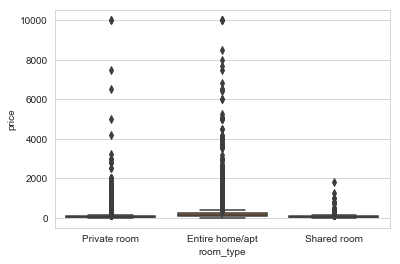

In [85]:
print('Box chart of price ranges by location')
boxplot = sns.boxplot(y='price', x='room_type', data=airbnb_data)

## Analyze Price in different location and room type

### Median price of diffent location and room type

In [86]:
# group the dataframe according to neighbourhood group and room type
# get the insight according neighbourhood group and room type together
neibourhood_room_type = airbnb_data.groupby(['neighbourhoodGroup','room_type'])
median_price_neibourhood = neibourhood_room_type['price'].median()
print(f'median prices are:{median_price_neibourhood}')

median prices are:neighbourhoodGroup  room_type      
Bronx               Entire home/apt    100.0
                    Private room        53.5
                    Shared room         40.0
Brooklyn            Entire home/apt    145.0
                    Private room        65.0
                    Shared room         36.0
Manhattan           Entire home/apt    191.0
                    Private room        90.0
                    Shared room         69.0
Queens              Entire home/apt    120.0
                    Private room        60.0
                    Shared room         37.0
Staten Island       Entire home/apt    100.0
                    Private room        50.0
                    Shared room         30.0
Name: price, dtype: float64


### Graph of diffent location and room type

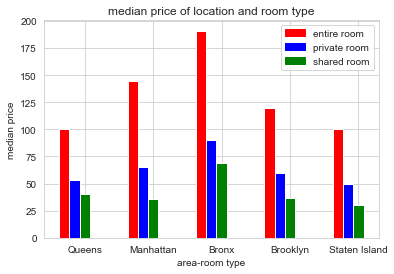

In [87]:
neighbourhood_group_name = list(set(airbnb_data['neighbourhoodGroup']))
room_type_neibourhood = airbnb_data.groupby(['room_type','neighbourhoodGroup'])
median_price_room = room_type_neibourhood['price'].median()

median_entire_room = median_price_room['Entire home/apt']
median_private_room = median_price_room['Private room']
median_shared_room = median_price_room['Shared room']
x = np.arange(len(median_entire_room))
bar_width = 0.15
plt.bar(x, median_entire_room, width=bar_width,color='red',zorder=2)
plt.bar(x+bar_width, median_private_room, width=bar_width,color='blue',zorder=2)
plt.bar(x+bar_width*2, median_shared_room, width=bar_width,color='green',zorder=2)

plt.xticks(x+bar_width*2, neighbourhood_group_name)
plt.xlabel('area-room type')
plt.ylabel('median price')
plt.title('median price of location and room type')

import matplotlib.patches as pa
red_patch = pa.Patch(color='red',label='entire room')
blue_patch = pa.Patch(color='blue',label='private room')
green_patch = pa.Patch(color='green',label='shared room')
plt.legend(handles=[red_patch,blue_patch,green_patch])

Box chart of price ranges by neighbourhood group


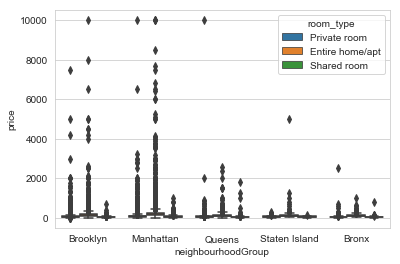

In [88]:
print('Box chart of price ranges by neighbourhood group')
hue_order=['red','blue','green','pink','black']
boxplot = sns.boxplot(y='price', x='neighbourhoodGroup', hue='room_type', 
                      notch=False,data=airbnb_data)

## Relationship analysis between minimum nights, reviews per month and price

In [89]:
# plot the relationship between price and reviews per month

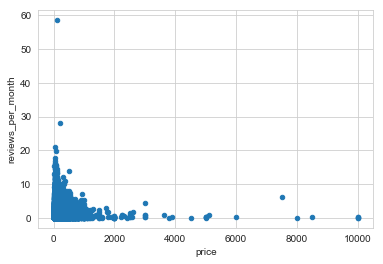

In [90]:
df = airbnb_data.dropna()
df.plot(kind = 'scatter', y='reviews_per_month',x='price')
#some abnormal price impact the analysis

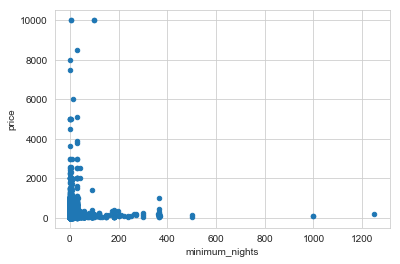

In [91]:
# plot the relationship between price and minimum nights
df.plot(kind='scatter',x ='minimum_nights',y='price')
#some abnormal price impact the analysis

In [92]:
data_price_sort = df.sort_values(by='price')

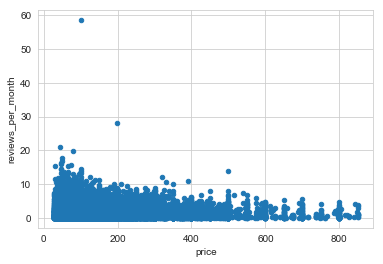

In [93]:
# remove very low and very high price items. results: lower prices ones got more reviews
data_price_sort[200:-200].plot.scatter(y= 'reviews_per_month', x='price')

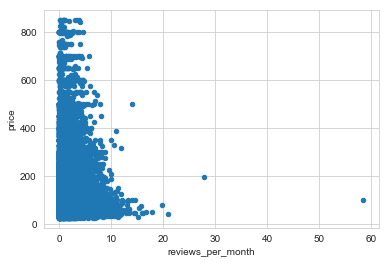

In [94]:
# remove very low and very high price items. 
#results: lower prices ones got more reviews
data_price_sort[200:-200].plot.scatter(x= 'reviews_per_month', y='price')

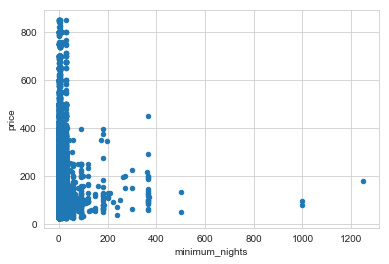

In [95]:
# remove very low and very high price items. 
#results: the longer nights the lower prices
data_price_sort[200:-200].plot.scatter(x= 'minimum_nights', y='price')

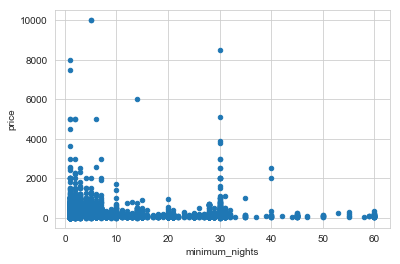

In [96]:
# remove very long nigths reservation records. 
#results: the longer nights the lower prices
data_night_sort = df.sort_values(by='minimum_nights')
data_night_sort[:-200].plot.scatter(x= 'minimum_nights', y='price')

## Findings:
#### 1, prices are highly relied on area, Mantthattan is the most expensive area
#### 2, room type impacts the price. prices of entire home are usually twice of private room, while prices of private room are usually #### 40% higher than shared room
#### 3, the prices show a trend of decreasing with minimal night increasing
#### 4, the higher the price, the fewer of reviews